In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from ipyparallel import Client

sns.set_style("whitegrid")

In [2]:
def generate_data(N):
    return np.concatenate(
        (np.random.uniform(low=-1, size=(N, 2)),
         np.ones(N).reshape(N, 1)),
        axis=1)


def define_line():
    x = np.random.uniform(low=-1, size=(2, 2))
    m = (x[0][1] - x[1][1]) / (x[0][0] - x[1][0])
    coeff_vector = np.array([-m, 1, m*x[0][0] - x[0][1]])

    return coeff_vector


def create_dataframe(x, coeff_vector):
    df = pd.DataFrame(data=x, columns=['x1', 'x2', 'bias'])
    df['y'] = np.sign(df[['x1', 'x2', 'bias']].values @ coeff_vector)

    return df

In [3]:
x = generate_data(10)

In [4]:
g = define_line()

In [5]:
print(g)

[2.9771748  1.         0.58906101]


In [6]:
df = create_dataframe(x, g)

In [7]:
df

,x1,x2,bias,y
0,0.658591,0.299212,1.0,1.0
1,-0.289821,0.405786,1.0,1.0
2,-0.043013,0.814263,1.0,1.0
3,-0.519785,-0.479263,1.0,-1.0
4,0.394094,-0.282292,1.0,1.0
5,-0.969612,0.872380,1.0,-1.0
6,0.008759,0.640401,1.0,1.0
7,0.044252,0.621393,1.0,1.0
8,-0.091856,-0.074503,1.0,1.0
9,-0.479298,-0.390038,1.0,-1.0


(-1, 1)

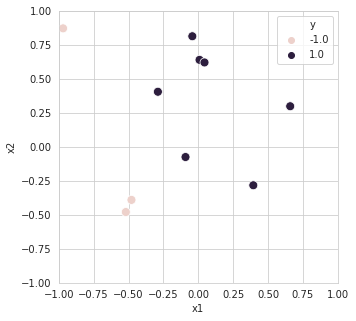

In [8]:
xx = np.linspace(-1, 1, 100)

plt.figure(figsize=(5, 5))
plt.ylim(-1, 1)
plt.xlim(-1, 1)

sns.scatterplot(x='x1', y='x2', data=df, hue='y', legend='full', s=80)
# sns.lineplot(xx, g(xx))
plt.ylim(-1, 1)
plt.xlim(-1, 1)

In [9]:
def run_experiment(run_id, N):
    """
    Awesome function description goes here
    """
    import numpy as np
    import pandas as pd
    
###########################################
    def generate_data(N):
        return np.concatenate(
            (np.random.uniform(low=-1, size=(N, 2)),
             np.ones(N).reshape(N, 1)),
            axis=1)


    def define_line():
        x = np.random.uniform(low=-1, size=(2, 2))
        m = (x[0][1] - x[1][1]) / (x[0][0] - x[1][0])
        coeff_vector = np.array([-m, 1, m*x[0][0] - x[0][1]])

        return coeff_vector


    def create_dataframe(x, coeff_vector):
        df = pd.DataFrame(data=x, columns=['x1', 'x2', 'bias'])
        df['y'] = np.sign(df[['x1', 'x2', 'bias']].values @ coeff_vector)

        return df
###########################################

    x = generate_data(N)
    g = define_line()
    df = create_dataframe(x, g)
    
    X = df[['x1', 'x2', 'bias']].values
    y = df['y'].values
    
    pseudo_inverse = lambda X: np.linalg.inv(X.T @ X) @ X.T
    X_pinv = pseudo_inverse(X)
    
    w = X_pinv @ y
    
    h = lambda x, w: np.sign(x @ w)
    it = 0
    while True:
        y_pred = h(df[['x1', 'x2', 'bias']], w)
        check_y_pred_vs_y_true = np.equal(y_pred, df['y'].values)
        wrong_examples = np.where(check_y_pred_vs_y_true == False)[0]

        if wrong_examples.shape[0] == 0:
            return it

        random_example_idx = np.random.choice(wrong_examples)
        random_example = df[['x1', 'x2', 'bias']].iloc[random_example_idx]

        w += random_example.values * df['y'].iloc[random_example_idx]
        it += 1

In [10]:
X = df[['x1', 'x2', 'bias']].values

In [11]:
y = df['y'].values

In [12]:
pseudo_inverse = lambda X: np.linalg.inv(X.T @ X) @ X.T

In [13]:
X_pinv = pseudo_inverse(X)

In [14]:
w = X_pinv @ y

In [15]:
y_pred = np.sign(X @ w)

In [16]:
np.mean(y != y_pred)

0.0

In [17]:
rc = Client()
print(rc.ids)

[0, 1, 2, 3]


In [18]:
dv = rc[:]

In [21]:
runs = 1000

res = dv.map_async(run_experiment, np.arange(runs), [10]*runs)
x = res.get()

In [22]:
df = pd.DataFrame(data=x, columns=['iterations'])
df.mean(axis=0)

iterations    3.662
dtype: float64